In [ ]:
#Objective 1:
    #Which day of the week yields the most PROFITABILITY
    #Which day of the week has the most VARIANCE compared to the other days of the week (daily ranges/closing price)
        #Which day of the week has the most volume, but smallest price change (options killer)

In [ ]:
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import time
import csv
import datetime
import pandas as pd
import numpy as np


In [ ]:
#Extracting data from Yahoo finance from 2016-present day for stock AMD

query=f"https://query1.finance.yahoo.com/v7/finance/download/AMD?period1=1479427200&period2=1637193600&interval=1d&events=history&includeAdjustedClose=true"
df=pd.read_csv(query)
data_frame=pd.DataFrame(df)
df.to_csv('/Users/lazarfuchs/Downloads/AMDeps.csv')

#Add some cool MAs below
df['20 DMA'] = df['Close'].rolling(window=20).mean()
df['50 DMA'] = df['Close'].rolling(window=50).mean()
df['200 DMA'] = df['Close'].rolling(window=200).mean()
print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     2016-11-18    8.680000    8.830000    8.400000    8.710000    8.710000   
1     2016-11-21    8.870000    9.220000    8.860000    8.940000    8.940000   
2     2016-11-22    9.050000    9.060000    8.540000    8.690000    8.690000   
3     2016-11-23    8.720000    8.860000    8.500000    8.800000    8.800000   
4     2016-11-25    8.800000    8.910000    8.690000    8.770000    8.770000   
...          ...         ...         ...         ...         ...         ...   
1253  2021-11-11  142.960007  146.470001  140.839996  146.009995  146.009995   
1254  2021-11-12  146.029999  148.589996  144.250000  147.889999  147.889999   
1255  2021-11-15  148.000000  148.979996  142.860001  146.490005  146.490005   
1256  2021-11-16  145.929993  153.080002  145.339996  152.449997  152.449997   
1257  2021-11-17  151.979996  154.660004  149.690002  151.339996  151.339996   

        Volume    20 DMA    50 DMA   20

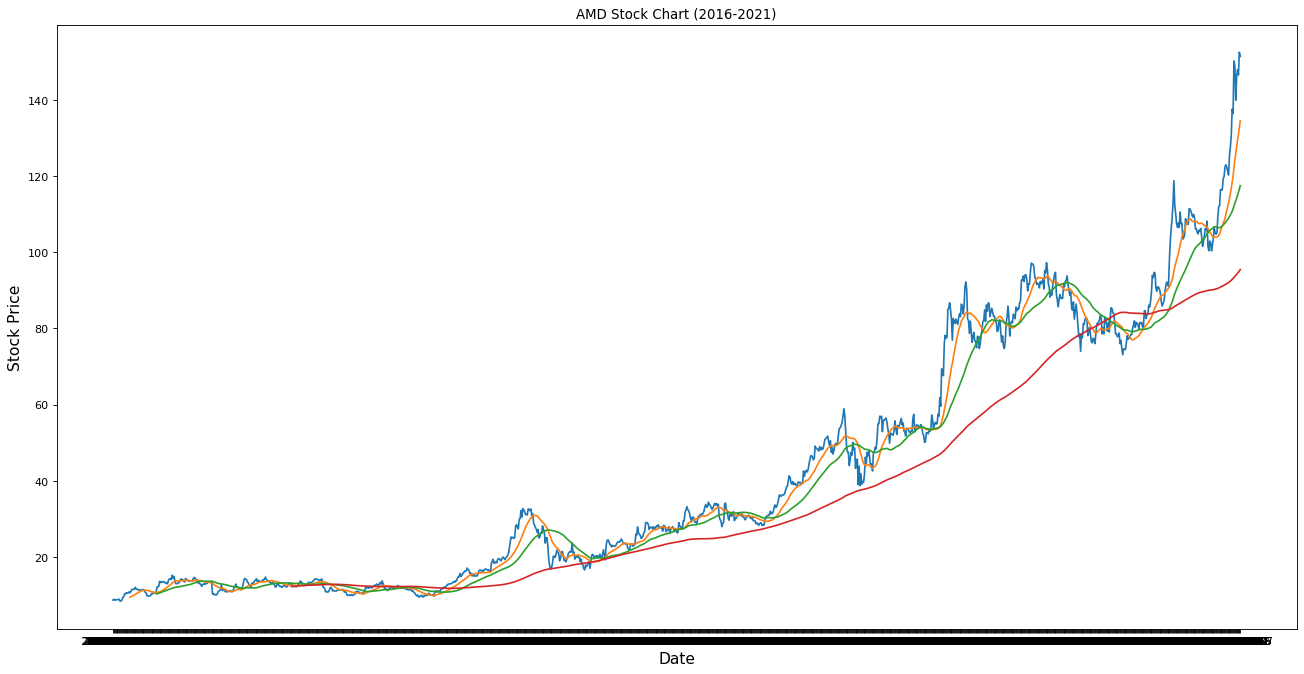

In [ ]:
#Basic Chart of AMD
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(20,10),dpi=80)
plt.plot(df['Date'], df['Close'])
plt.title('AMD Stock Chart (2016-2021)')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.plot(df['Date'], df['20 DMA'])
plt.plot(df['Date'], df['50 DMA'])
plt.plot(df['Date'], df['200 DMA'])

In [ ]:
#Creating new columns using the data extracted and transform into a data frame

df['Daily Ranges']=df['High']-df['Low']
df['Daily Returns']=(df['Close'].pct_change())*100
df['Day of Week']=pd.to_datetime(df['Date'])
df['Daily Variance']=df['Daily Ranges']/df['Close']
df['Options Killer']=(df['Daily Returns']/df['Volume'])*10000000
df['Day of Week']=df['Day of Week'].dt.day_name()
print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     2016-11-18    8.680000    8.830000    8.400000    8.710000    8.710000   
1     2016-11-21    8.870000    9.220000    8.860000    8.940000    8.940000   
2     2016-11-22    9.050000    9.060000    8.540000    8.690000    8.690000   
3     2016-11-23    8.720000    8.860000    8.500000    8.800000    8.800000   
4     2016-11-25    8.800000    8.910000    8.690000    8.770000    8.770000   
...          ...         ...         ...         ...         ...         ...   
1253  2021-11-11  142.960007  146.470001  140.839996  146.009995  146.009995   
1254  2021-11-12  146.029999  148.589996  144.250000  147.889999  147.889999   
1255  2021-11-15  148.000000  148.979996  142.860001  146.490005  146.490005   
1256  2021-11-16  145.929993  153.080002  145.339996  152.449997  152.449997   
1257  2021-11-17  151.979996  154.660004  149.690002  151.339996  151.339996   

        Volume  Daily Ranges  Daily Ret

In [ ]:
#Extracting data from main data frame per day of week

Mon=df.loc[df['Day of Week'] == 'Monday']
Tue=df.loc[df['Day of Week'] == 'Tuesday']
Wed=df.loc[df['Day of Week'] == 'Wednesday']
Thu=df.loc[df['Day of Week'] == 'Thursday']
Fri=df.loc[df['Day of Week'] == 'Friday']

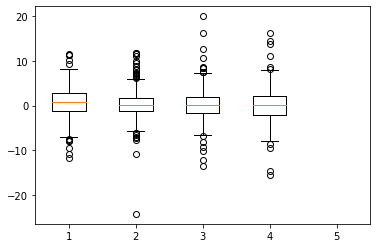

In [ ]:
#Creating multiple lists of the Daily Returns per week to visualize a Box and Wiskers Chart

Mon_mean=Mon['Daily Returns']
Tue_mean=Tue['Daily Returns']
Wed_mean=Wed['Daily Returns']
Thu_mean=Thu['Daily Returns']
Fri_mean=Fri['Daily Returns']


sList=[Mon_mean,Tue_mean,Wed_mean,Thu_mean,Fri_mean]
bp=plt.boxplot(sList)
plt.xlabel("Day of Week")
plt.ylabel("Daily Returns")
plt.title("Daily Returns Per Day of Week")

In [ ]:
#Wednesday shows the greatest variance in the daily returns of stock AMD. Wednesday appears to be the best day to day trade

In [ ]:
#Which day of the week yields the most PROFITABILITY
#Fist we must get the mean of the daily returns for each day of the week
Mon_mean=Mon['Daily Returns'].mean()
Tue_mean=Tue['Daily Returns'].mean()
Wed_mean=Wed['Daily Returns'].mean()
Thu_mean=Thu['Daily Returns'].mean()
Fri_mean=Fri['Daily Returns'].mean()

     Monday   Tuesday  Wednesday  Thursday    Friday
0  0.717008  0.278358   0.284293  0.126246  0.071043


Text(0.5, 1.0, 'Mean of Daily Returns Per Day of Week')

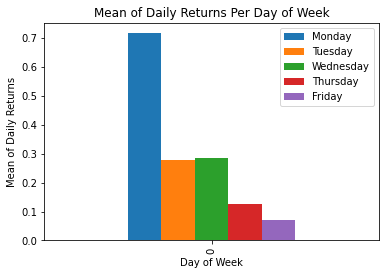

In [ ]:
#Next we must convert the mean data into a data frame, then create the visuals
WeekDayMean={'Monday': [Mon_mean],'Tuesday': [Tue_mean], 'Wednesday': [Wed_mean], 'Thursday': [Thu_mean], 'Friday': [Fri_mean]}
WeekDay_Mean=pd.DataFrame(WeekDayMean)
print(WeekDay_Mean)

WeekDay_Mean.plot.bar()
plt.xlabel("Day of Week")
plt.ylabel("Mean of Daily Returns")
plt.title("Mean of Daily Returns Per Day of Week")

In [ ]:
#Monday is the most profitable day for stock AMD

In [ ]:
#Which day of the week has the most VARIANCE compared to the other days of the week
#Fist we must get the mean of the daily variance for each day of the week

In [ ]:
Mon_Variance=Mon['Daily Ranges']
Tue_Variance=Tue['Daily Ranges']
Wed_Variance=Wed['Daily Ranges']
Thu_Variance=Thu['Daily Ranges']
Fri_Variance=Fri['Daily Ranges']

Text(0.5, 1.0, 'Daily Ranges Per Day of Week')

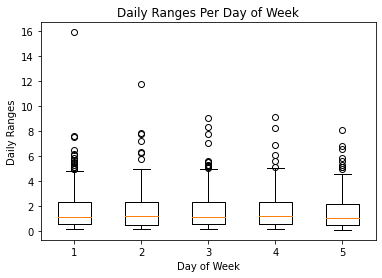

In [ ]:
#Daily Ranges box and wisker by day
sList=[Mon_Variance,Tue_Variance,Wed_Variance,Thu_Variance,Fri_Variance]
bp=plt.boxplot(sList)
plt.xlabel("Day of Week")
plt.ylabel("Daily Ranges")
plt.title("Daily Ranges Per Day of Week")

In [ ]:
#Now lets look at the mean of the daily ranges for each day of the week

Mon_Variance=Mon['Daily Ranges'].mean()
Tue_Variance=Tue['Daily Ranges'].mean()
Wed_Variance=Wed['Daily Ranges'].mean()
Thu_Variance=Thu['Daily Ranges'].mean()
Fri_Variance=Fri['Daily Ranges'].mean()

     Monday   Tuesday  Wednesday  Thursday   Friday
0  1.752034  1.673915   1.652607  1.628976  1.52751


Text(0.5, 1.0, 'Mean of Daily Ranges Per Day of Week')

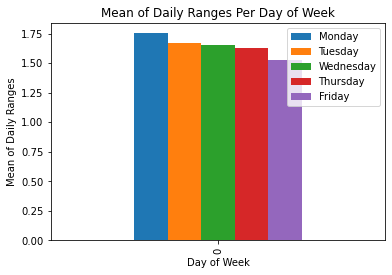

In [ ]:
#Next we must convert the mean data into a data frame, then create the visuals
WeekDayVariance={'Monday': [Mon_Variance],'Tuesday': [Tue_Variance], 'Wednesday': [Wed_Variance], 'Thursday': [Thu_Variance], 'Friday': [Fri_Variance]}
WeekDay_Variance=pd.DataFrame(WeekDayVariance)
print(WeekDay_Variance)

WeekDay_Variance.plot.bar()
plt.xlabel("Day of Week")
plt.ylabel("Mean of Daily Ranges")
plt.title("Mean of Daily Ranges Per Day of Week")

Text(0.5, 1.0, 'Options Killer')

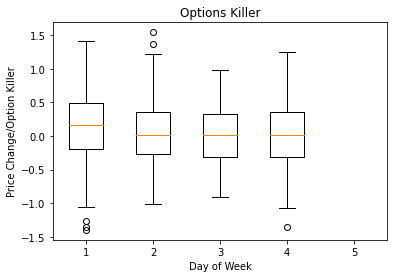

In [ ]:
#Which day of the week has the most volume, but smallest price change (options killer)
Mon_Volume=Mon['Options Killer']
Tue_Volume=Tue['Options Killer']
Wed_Volume=Wed['Options Killer']
Thu_Volume=Thu['Options Killer']
Fri_Volume=Fri['Options Killer']


sList=[Mon_Volume,Tue_Volume,Wed_Volume,Thu_Volume,Fri_Volume]
bp=plt.boxplot(sList)
plt.xlabel("Day of Week")
plt.ylabel("Price Change/Option Killer")
plt.title("Options Killer")

In [ ]:
#We want to short options that have the biggest variance in out indicator Options Killer
#Thursday looks like the best day to short options while Wednesday appears to be the worst day

#It appears that Wednesday is the best day for steady, consitant gains after anaylzing all the day

In [ ]:
#Objective 2:
    #Which months yields the greatest profit compared to its P/E ratio
    #Which months yields the lowest profit compared to its P/E ratio
    #Is there correlation between volume/returns and its Trailing PE Ratio?

In [ ]:
#Extracting the EPS of each quarter and creating a dataframe from the data

html=urlopen("https://www.macrotrends.net/stocks/charts/AMD/amd/eps-earnings-per-share-diluted")
bs=soup(html,'html.parser')
data=bs.findAll('table')
pe_data_2=[]
for x in data:
    tr_tags=x.findAll('tr')
    for x in tr_tags:
        td_tags=x.findAll('td')
        for x in td_tags:
            pe_data_2.append(x.get_text())
eps_qd=pe_data_2[32::2]
eps_q=pe_data_2[33::2]
eps_qd=eps_qd[0:67]
eps_q=eps_q[0:67]
print(eps_q)
Q_eps={'Date': [eps_qd], 'EPS': [eps_q]}
Q_eps=pd.DataFrame(Q_eps)
Q_eps.to_csv(r'/Users/lazarfuchs/Downloads/AMDeps.csv') #Change file location here

['$0.75', '$0.58', '$0.45', '$1.47', '$0.32', '$0.13', '$0.14', '$0.15', '$0.11', '$0.03', '$0.01', '$0.04', '$0.09', '$0.11', '$0.08', '$-0.01', '$0.06', '$-0.04', '$-0.04', '$-0.04', '$-0.50', '$0.08', '$-0.14', '$-0.13', '$-0.25', '$-0.23', '$-0.23', '$-0.47', '$0.02', '$-0.05', '$-0.03', '$0.12', '$0.06', '$-0.10', '$-0.19', '$-0.64', '$-0.21', '$0.05', '$-0.80', '$-0.23', '$0.13', '$0.08', '$0.68', '$0.52', '$-0.17', '$-0.06', '$0.35', '$1.78', '$-0.18', '$-0.49', '$-0.66', '$-2.36', '$-0.22', '$-1.97', '$-0.60', '$-3.17', '$-0.71', '$-1.09', '$-1.11', '$-1.17', '$0.27', '$0.18', '$0.38', '$0.23', '$0.18', '$0.03', '$-0.04']


In [ ]:
#Extracting Weekly data for Stock AMD

query=f"https://query1.finance.yahoo.com/v7/finance/download/AMD?period1=1480118400&period2=1637884800&interval=1wk&events=history&includeAdjustedClose=true"
dm=pd.read_csv(query)
data_frame=pd.DataFrame(dm)
dm['Weekly Ranges']=dm['High']-dm['Low']
dm['Weekly Returns']=(dm['Close'].pct_change())*100
dm['Weekly  Variance']=dm['Weekly Ranges']/dm['Close']
dm.to_csv('/Users/lazarfuchs/Downloads/AMDeps.csv')#Saving to Excel Format here
print(dm)

           Date        Open        High         Low       Close   Adj Close  \
0    2016-11-21    8.800000    8.910000    8.690000    8.770000    8.770000   
1    2016-11-28    8.720000    9.230000    8.260000    8.530000    8.530000   
2    2016-12-05    8.690000   10.660000    8.450000   10.340000   10.340000   
3    2016-12-12   10.400000   11.230000   10.270000   10.660000   10.660000   
4    2016-12-19   10.810000   11.750000   10.520000   11.580000   11.580000   
..          ...         ...         ...         ...         ...         ...   
257  2021-10-25  120.519997  128.080002  118.599998  120.230003  120.230003   
258  2021-11-01  119.449997  141.220001  118.129997  136.339996  136.339996   
259  2021-11-08  137.699997  155.649994  137.699997  147.889999  147.889999   
260  2021-11-15  148.000000  158.889999  142.860001  155.410004  155.410004   
261  2021-11-22  157.139999  161.880005  145.300003  157.800003  157.800003   

        Volume  Weekly Ranges  Weekly Returns  Week

In [ ]:
#Using the data from both the weekly historical data and the EPS historical data, we used the VlookUp function in excel,
#to add the corresponding EPS to excel. We will now be uploading the new data frame and finding the current PE ratios for each
#week of data

In [ ]:
#Loading the EPS data into our Weekly Data Frame, and analyzing the weekly calculated PE ratios

WeeklyEPS=dm
EPS=pd.read_csv(r'/Users/lazarfuchs/Downloads/AMDeps.csv')#CHANGE FILE NAME HERE AFTER DOWNLOAD
WeeklyEPS['EPS']=EPS['EPS'] #Adding the column of data to our main data frame
WeeklyEPS['PE Ratio']=WeeklyEPS['Close']/(WeeklyEPS['EPS']*4)

In [ ]:
print(WeeklyEPS)

           Date        Open        High         Low       Close   Adj Close  \
0    2016-11-21    8.800000    8.910000    8.690000    8.770000    8.770000   
1    2016-11-28    8.720000    9.230000    8.260000    8.530000    8.530000   
2    2016-12-05    8.690000   10.660000    8.450000   10.340000   10.340000   
3    2016-12-12   10.400000   11.230000   10.270000   10.660000   10.660000   
4    2016-12-19   10.810000   11.750000   10.520000   11.580000   11.580000   
..          ...         ...         ...         ...         ...         ...   
257  2021-10-25  120.519997  128.080002  118.599998  120.230003  120.230003   
258  2021-11-01  119.449997  141.220001  118.129997  136.339996  136.339996   
259  2021-11-08  137.699997  155.649994  137.699997  147.889999  147.889999   
260  2021-11-15  148.000000  158.889999  142.860001  155.410004  155.410004   
261  2021-11-22  157.139999  161.880005  145.300003  157.800003  157.800003   

        Volume  Weekly Ranges  Weekly Returns  Week

In [ ]:
#We will now compute the Weekly EPS per each row of data. He we simply multiply the Q EPS by 4 to get estimate then compute PE Ratio

WeeklyEPS['EPS']=WeeklyEPS['EPS']*4
WeeklyEPS['PE Ratio']=WeeklyEPS['Close']/WeeklyEPS['EPS'] 
WeeklyEPS['Log of PE Ratio']=np.log(WeeklyEPS['PE Ratio'])
WeeklyEPS['Log of Volume']=np.log(WeeklyEPS['Volume'])
WeeklyEPS['Log of Weekly Returns']=np.log2(WeeklyEPS['Weekly Returns'])
print(WeeklyEPS)

           Date        Open        High         Low       Close   Adj Close  \
0    2016-11-21    8.800000    8.910000    8.690000    8.770000    8.770000   
1    2016-11-28    8.720000    9.230000    8.260000    8.530000    8.530000   
2    2016-12-05    8.690000   10.660000    8.450000   10.340000   10.340000   
3    2016-12-12   10.400000   11.230000   10.270000   10.660000   10.660000   
4    2016-12-19   10.810000   11.750000   10.520000   11.580000   11.580000   
..          ...         ...         ...         ...         ...         ...   
257  2021-10-25  120.519997  128.080002  118.599998  120.230003  120.230003   
258  2021-11-01  119.449997  141.220001  118.129997  136.339996  136.339996   
259  2021-11-08  137.699997  155.649994  137.699997  147.889999  147.889999   
260  2021-11-15  148.000000  158.889999  142.860001  155.410004  155.410004   
261  2021-11-22  157.139999  161.880005  145.300003  157.800003  157.800003   

        Volume  Weekly Ranges  Weekly Returns  Week

C:\Users\Edwar\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Edwar\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Edwar\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
#We are going to be taking the log of the PE ratios to get a better visual when comparing to the Weekly Returns of the stock.
#We performed the log of the pe ratio function above

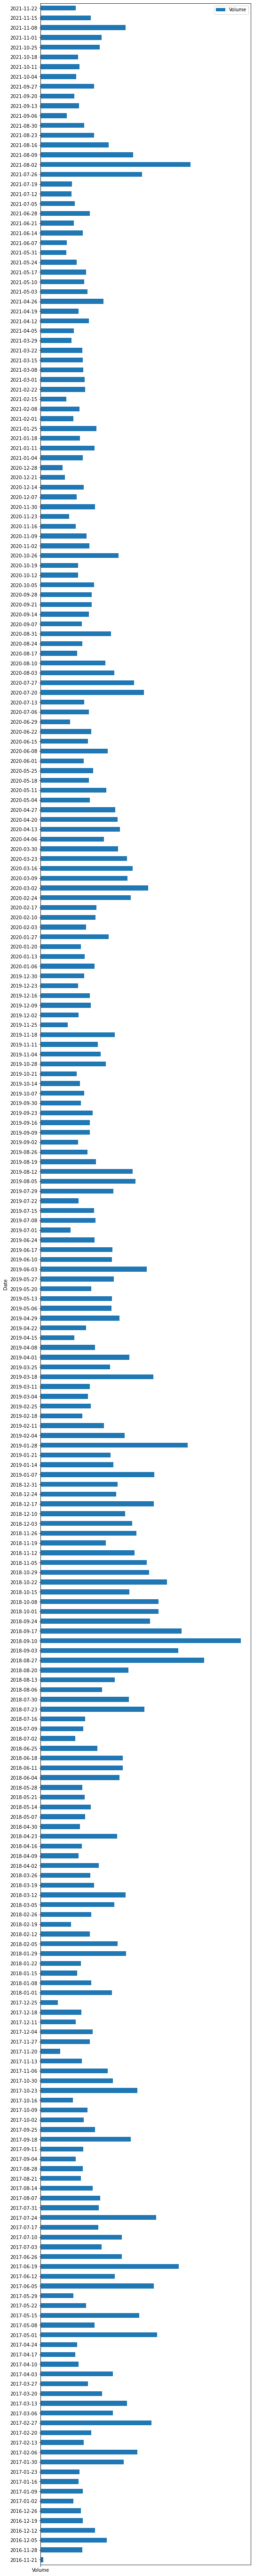

In [ ]:
#Lets take a look at which times of the year yields the greatest volume (catalyst)
#As we can see, it looks like 

dm.plot(x='Date', y=['Volume'], kind='barh', figsize=(8,100))
plt.axvline(x='Volume')

In [ ]:
#Creating a moving average for the PE Ratio of our data to vizualize
WeeklyEPS['Pandas 15 Week MA'] = WeeklyEPS['Log of PE Ratio'].rolling(window=15).mean()

<Figure size 432x288 with 0 Axes>

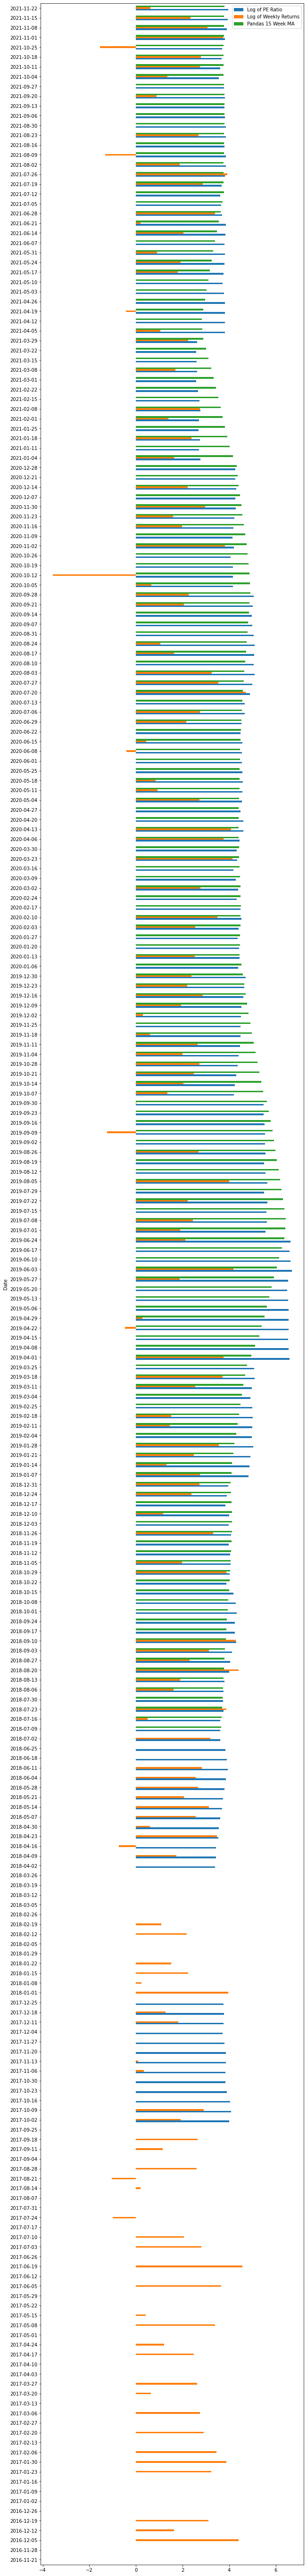

In [ ]:
fig=plt.figure()
ax = WeeklyEPS.plot(x='Date', y=['Log of PE Ratio', 'Log of Weekly Returns', 'Pandas 15 Week MA'], kind='barh', figsize=(10,100))

In [ ]:
#To conclude, AMD is a BUY during the months of July and August. During those two months, volume as been greater than perious
#data, and as a result, we see a spike in Weekly Returns following a decline in its overall PE ratio!

#The best times to buy are when the PE Ratio and its 'Pandas 15 Weekly MA' are nearly perfectly alligned.
#Think of the Pandas 15 Weekly MA as the trailing 15 Week Moving average of the PE Ratio
#When they align from being disconnected for some time, the price of the stock is primed for some growth(especially with volume)

#Note when the PE Ratio lags, it begins to play catchup via positive returns and volume. Vice Versa

In [ ]:
WeeklyEPS['Log of Price']=np.log2(WeeklyEPS['Close'])

Text(0.5, 1.0, 'Price to PE ratios')

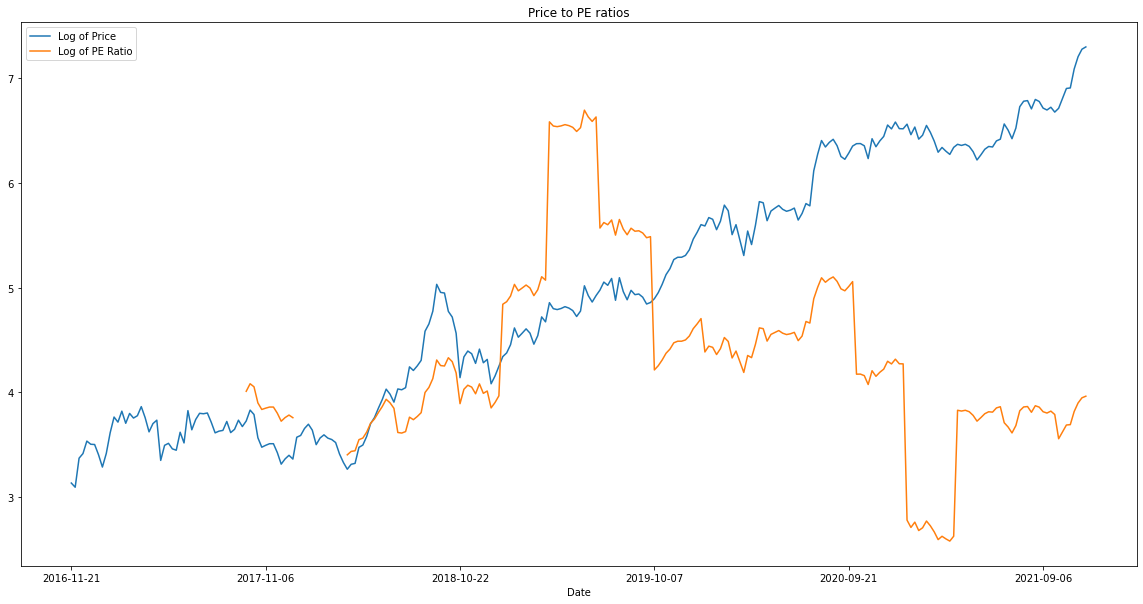

In [ ]:
WeeklyEPS.plot(x='Date', y=['Log of Price', 'Log of PE Ratio'], figsize=(20,10))
plt.title('Price to PE ratios')

In [ ]:
#The chart represents that stock AMD is becoming more of a 'mature' company rather than a 'growth' company
#Reason being is because as a company become more mature, its PE ratio Declines while the Price steadily goes up

In [ ]:
#Citations

#https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
#https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot-in-matplotlib
#https://towardsdatascience.com/implementing-moving-averages-in-python-1ad28e636f9d
#https://datavizpyr.com/how-to-make-a-time-series-plot-with-rolling-average-in-python/
#https://stackoverflow.com/questions/54389006/pandas-how-to-transform-all-numeric-columns-of-a-data-frame-into-logarithms
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
#https://matplotlib.org/stable/gallery/index.html
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
#https://www.w3schools.com/python/matplotlib_labels.asp
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html